## 11. The datetime Data Type

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

print(now)

2022-07-25 09:28:03.772553


In [3]:
t1 = datetime.now()

t2 = datetime(1970, 1, 1)

In [4]:
diff = t1 - t2

print(diff)

19198 days, 9:28:03.778614


In [5]:
print(type(diff))

<class 'datetime.timedelta'>


In [6]:
import pandas as pd

ebola = pd.read_csv('data/country_timeseries.csv')


In [7]:
ebola.Date.describe()

count          122
unique         122
top       1/5/2015
freq             1
Name: Date, dtype: object

In [8]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'], format='%m/%d/%Y')

In [9]:
ebola.dtypes

Date                           object
Day                             int64
Cases_Guinea                  float64
Cases_Liberia                 float64
Cases_SierraLeone             float64
Cases_Nigeria                 float64
Cases_Senegal                 float64
Cases_UnitedStates            float64
Cases_Spain                   float64
Cases_Mali                    float64
Deaths_Guinea                 float64
Deaths_Liberia                float64
Deaths_SierraLeone            float64
Deaths_Nigeria                float64
Deaths_Senegal                float64
Deaths_UnitedStates           float64
Deaths_Spain                  float64
Deaths_Mali                   float64
date_dt                datetime64[ns]
dtype: object

In [10]:
ebola = pd.read_csv('data/country_timeseries.csv', parse_dates=[0])

print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [11]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [12]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()


print(ebola[['Date', 'Day', 'outbreak_d']].head())

        Date  Day outbreak_d
0 2015-01-05  289   289 days
1 2015-01-04  288   288 days
2 2015-01-03  287   287 days
3 2015-01-02  286   286 days
4 2014-12-31  284   284 days


In [13]:
print(ebola[['Date', 'Day', 'outbreak_d']].tail())

          Date  Day outbreak_d
117 2014-03-27    5     5 days
118 2014-03-26    4     4 days
119 2014-03-25    3     3 days
120 2014-03-24    2     2 days
121 2014-03-22    0     0 days


In [16]:
banks = pd.read_csv('data/banklist.csv')

print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
1  30003  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
2  58302                         Whitney Bank    28-Apr-17    26-Jul-17  
3  35495                    Cache Valley Bank     3-Mar-17    18-May-17  
4  19328                  State Bank of Texas    27-Jan-17    18-May-17  


In [17]:
banks.dtypes

Bank Name                object
City                     object
ST                       object
CERT                      int64
Acquiring Institution    object
Closing Date             object
Updated Date             object
dtype: object

In [19]:
banks = pd.read_csv('data/banklist.csv', parse_dates=[5, 6])

print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB
None


In [20]:
banks['closing_quarter'], banks['closing_year'] =(banks['Closing Date'].dt.quarter,banks['Closing Date'].dt.year)

In [21]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26,2,2017
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18,1,2017
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18,1,2017


In [22]:
closing_year = banks.groupby(['closing_year']).size()

In [23]:
closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64

In [24]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()

In [25]:
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

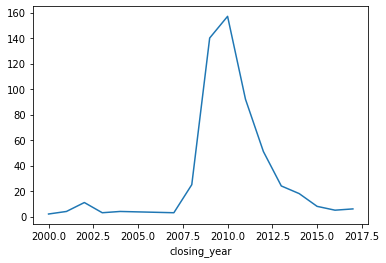

In [30]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax = closing_year.plot()

# ax = closing_year_q.plot()

plt.show()

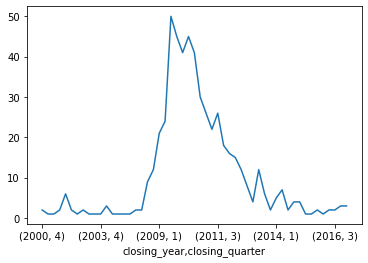

In [31]:
fig, ax = plt.subplots()

ax = closing_year_q.plot()

plt.show()

In [34]:
import pandas_datareader as pdr
tesla = pdr.get_data_yahoo('TSLA')
tesla = pd.read_csv('data/tesla_stock_yahoo.csv', parse_dates=[0])

In [35]:
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
1786,2017-08-02,318.940002,327.119995,311.220001,325.890015,325.890015,13091500
1787,2017-08-03,345.329987,350.000000,343.149994,347.089996,347.089996,13535000
1788,2017-08-04,347.000000,357.269989,343.299988,356.910004,356.910004,9198400
1789,2017-08-07,357.350006,359.480011,352.750000,355.170013,355.170013,6276900


In [36]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

        Date       Open   High        Low      Close  Adj Close    Volume
0 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100


In [37]:
tesla.index = tesla['Date']

print(tesla.index)

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
               '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-07', '2017-08-08'],
              dtype='datetime64[ns]', name='Date', length=1791, freq=None)


In [39]:
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2017-08-02,2017-08-02,318.940002,327.119995,311.220001,325.890015,325.890015,13091500
2017-08-03,2017-08-03,345.329987,350.000000,343.149994,347.089996,347.089996,13535000
2017-08-04,2017-08-04,347.000000,357.269989,343.299988,356.910004,356.910004,9198400


In [49]:
print(tesla['2015'].iloc[:5, :5])

                 Date        Open        High         Low       Close
Date                                                                 
2015-01-02 2015-01-02  222.869995  223.250000  213.259995  219.309998
2015-01-05 2015-01-05  214.550003  216.500000  207.160004  210.089996
2015-01-06 2015-01-06  210.059998  214.199997  204.210007  211.279999
2015-01-07 2015-01-07  213.350006  214.779999  209.779999  210.949997
2015-01-08 2015-01-08  212.809998  213.800003  210.009995  210.619995


/var/folders/7b/2yrw0wyj5hjgm886sm7nc38r0000gn/T/ipykernel_1309/4283245189.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2015'].iloc[:5, :5])


In [54]:
print(tesla['2010-06'].iloc[:, :5])

                 Date       Open   High        Low      Close
Date                                                         
2010-06-29 2010-06-29  19.000000  25.00  17.540001  23.889999
2010-06-30 2010-06-30  25.790001  30.42  23.299999  23.830000


/var/folders/7b/2yrw0wyj5hjgm886sm7nc38r0000gn/T/ipykernel_1309/3669736055.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2010-06'].iloc[:, :5])


In [55]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()

In [56]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ref_date
Date,,,,,,,,
2010-06-29,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,0 days
2010-06-30,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,1 days
2010-07-01,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2 days
2010-07-02,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,3 days
2010-07-06,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7 days


In [60]:
ebola = pd.read_csv('data/country_timeseries.csv',parse_dates=[0])

print(ebola.iloc[:5,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [61]:

print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [63]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')

print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [64]:
ebola_5 = ebola.head()

In [65]:
ebola_5.index = ebola_5['Date']

In [66]:
ebola_5.reindex(head_range)


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
2014-12-31,2014-12-31,284.0,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN


In [67]:
print(ebola_5.iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


In [68]:
print(pd.date_range('2017-01-01', '2017-01-07', freq='B'))



DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


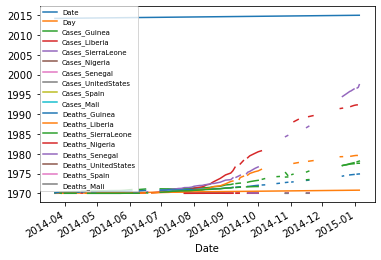

In [70]:
import matplotlib.pyplot as plt


ebola.index = ebola['Date']


fig, ax = plt.subplots()

ax = ebola.plot(ax=ax)

ax.legend(fontsize=7,

          loc=2,

          borderaxespad=0.)

plt.show()

In [74]:
ebola_sub = ebola[['Day', 'Deaths_Guinea', 'Deaths_Liberia']]

print(ebola_sub.tail(10))

            Day  Deaths_Guinea  Deaths_Liberia
Date                                          
2014-04-04   13           86.0             7.0
2014-04-01   10           83.0             5.0
2014-03-31    9           80.0             4.0
2014-03-29    7           70.0             2.0
2014-03-28    6           70.0             3.0
2014-03-27    5           66.0             6.0
2014-03-26    4           62.0             NaN
2014-03-25    3           60.0             NaN
2014-03-24    2           59.0             NaN
2014-03-22    0           29.0             NaN


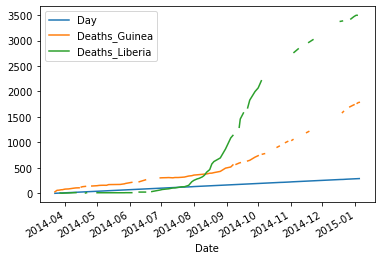

In [75]:
ax = ebola_sub.plot()
plt.show()

In [76]:
ebola = pd.read_csv('data/country_timeseries.csv',

                     index_col='Date',

                     parse_dates=['Date'])

print(ebola.head().iloc[:, :4])

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                           
2015-01-05  289        2776.0            NaN            10030.0
2015-01-04  288        2775.0            NaN             9780.0
2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02  286           NaN         8157.0                NaN
2014-12-31  284        2730.0         8115.0             9633.0


In [77]:
print(ebola.tail().iloc[:, :4])

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                           
2014-03-27    5         103.0            8.0                6.0
2014-03-26    4          86.0            NaN                NaN
2014-03-25    3          86.0            NaN                NaN
2014-03-24    2          86.0            NaN                NaN
2014-03-22    0          49.0            NaN                NaN


In [78]:
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

In [79]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [80]:
new_idx = reversed(new_idx)

In [82]:
print(new_idx)

In [83]:
ebola = ebola.reindex(new_idx)

In [90]:
ebola.tail(10).iloc[:,:4]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,
2014-03-31,9.0,122.0,8.0,2.0
2014-03-30,NaN,NaN,NaN,NaN
2014-03-29,7.0,112.0,7.0,NaN
2014-03-28,6.0,112.0,3.0,2.0
2014-03-27,5.0,103.0,8.0,6.0
2014-03-26,4.0,86.0,NaN,NaN
2014-03-25,3.0,86.0,NaN,NaN
2014-03-24,2.0,86.0,NaN,NaN
2014-03-23,NaN,NaN,NaN,NaN


In [89]:
last_valid = ebola.apply(pd.Series.last_valid_index)

print(last_valid)

Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [91]:
earliest_date = ebola.index.min()

print(earliest_date)

2014-03-22 00:00:00


In [92]:
shift_values = last_valid - earliest_date

print(shift_values)

Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [95]:
ebola_dict = {}

for idx, col in enumerate(ebola):
    print(idx)
    print(col)

    d = shift_values[idx].days

    shifted = ebola[col].shift(d)

    ebola_dict[col] = shifted

0
Day
1
Cases_Guinea
2
Cases_Liberia
3
Cases_SierraLeone
4
Cases_Nigeria
5
Cases_Senegal
6
Cases_UnitedStates
7
Cases_Spain
8
Cases_Mali
9
Deaths_Guinea
10
Deaths_Liberia
11
Deaths_SierraLeone
12
Deaths_Nigeria
13
Deaths_Senegal
14
Deaths_UnitedStates
15
Deaths_Spain
16
Deaths_Mali


In [94]:
enumerate(ebola)

In [96]:
ebola_dict

{'Day': Date
 2015-01-05    289.0
 2015-01-04    288.0
 2015-01-03    287.0
 2015-01-02    286.0
 2015-01-01      NaN
               ...  
 2014-03-26      4.0
 2014-03-25      3.0
 2014-03-24      2.0
 2014-03-23      NaN
 2014-03-22      0.0
 Name: Day, Length: 290, dtype: float64,
 'Cases_Guinea': Date
 2015-01-05    2776.0
 2015-01-04    2775.0
 2015-01-03    2769.0
 2015-01-02       NaN
 2015-01-01       NaN
                ...  
 2014-03-26      86.0
 2014-03-25      86.0
 2014-03-24      86.0
 2014-03-23       NaN
 2014-03-22      49.0
 Name: Cases_Guinea, Length: 290, dtype: float64,
 'Cases_Liberia': Date
 2015-01-05    NaN
 2015-01-04    NaN
 2015-01-03    NaN
 2015-01-02    NaN
 2015-01-01    NaN
              ... 
 2014-03-26    8.0
 2014-03-25    NaN
 2014-03-24    7.0
 2014-03-23    3.0
 2014-03-22    8.0
 Name: Cases_Liberia, Length: 290, dtype: float64,
 'Cases_SierraLeone': Date
 2015-01-05    NaN
 2015-01-04    NaN
 2015-01-03    NaN
 2015-01-02    NaN
 2015-01-01    

In [97]:
ebola_shift = pd.DataFrame(ebola_dict)

In [98]:
import pytz

In [100]:
print(pytz.all_timezones)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [102]:
import re

regex = re.compile('^US')

selected_files = filter(regex.search, pytz.all_timezones)

print(list(selected_files))

['US/Alaska', 'US/Aleutian', 'US/Arizona', 'US/Central', 'US/East-Indiana', 'US/Eastern', 'US/Hawaii', 'US/Indiana-Starke', 'US/Michigan', 'US/Mountain', 'US/Pacific', 'US/Samoa']


In [103]:
depart = pd.Timestamp('2017-08-29 07:00', tz='US/Eastern')

print(depart)

2017-08-29 07:00:00-04:00


In [104]:
arrive = pd.Timestamp('2017-08-29 09:57')

print(arrive)

2017-08-29 09:57:00


In [105]:
arrive = arrive.tz_localize('US/Pacific')

print(arrive)

2017-08-29 09:57:00-07:00


In [106]:
duration = arrive - depart

In [107]:
duration

Timedelta('0 days 05:57:00')